In [3]:
!pip install spacy-transformers

     |████████████████████████████████| 51 kB 140 kB/s 
     |████████████████████████████████| 1.1 MB 9.8 MB/s 
     |████████████████████████████████| 451 kB 35.1 MB/s 
     |████████████████████████████████| 6.0 MB 52.4 MB/s 
     |████████████████████████████████| 3.8 MB 47.7 MB/s 
     |████████████████████████████████| 181 kB 57.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 38.7 MB/s 
     |████████████████████████████████| 653 kB 70.0 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 6.5 MB 36.6 MB/s 
     |████████████████████████████████| 895 kB 45.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstall

In [29]:
!pip install spacy==2.2.4

     |████████████████████████████████| 10.6 MB 5.6 MB/s 
     |████████████████████████████████| 184 kB 38.7 MB/s 
     |████████████████████████████████| 2.2 MB 48.1 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.7
    Uninstalling catalogue-2.0.7:
      Successfully uninstalled catalogue-2.0.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.15
    Uninstalling thinc-8.0.15:
      Successfully uninstalled thinc-8.0.15
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.4
    Uninstalling spacy-3.2.4:
      Successfully uninstalled spacy-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy-transformers 1.1.5 requires spacy<

In [1]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 460.2 MB 32 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [30]:
!python -m spacy download en_trf_bertbaseuncased_lg

     |████████████████████████████████| 405.8 MB 1.2 MB/s 
     |████████████████████████████████| 6.0 MB 3.2 MB/s 
     |████████████████████████████████| 51 kB 3.8 MB/s 
     |████████████████████████████████| 3.4 MB 29.5 MB/s 
     |████████████████████████████████| 51 kB 8.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.7 MB/s 
     |████████████████████████████████| 51 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 44.2 MB/s 
     |████████████████████████████████| 50 kB 49.2 MB/s 
     |████████████████████████████████| 42 kB 23.8 MB/s 
     |████████████████████████████████| 2.6 MB 43.1 MB/s 
     |████████████████████████████████| 42 kB 34.1 MB/s 
     |████████████████████████████████| 40 kB 33.8 MB/s 
     |████████████████████████████████| 2.2 MB 45.8 MB/s 
     |████████████████████████████████| 2.1 MB 36.2 MB/s 
     |████████████████████████████████| 5.8 MB 43.2 MB/s 
     |████████████████████████████████| 1.8 MB 51.0 MB/s 
     |███████████████████

In [1]:
import spacy
import torch
import numpy as np
from numpy.testing import assert_almost_equal

nlp = spacy.load("en_trf_bertbaseuncased_lg")
doc = nlp("Here is some text to encode.")

In [2]:
import pandas as pd 
import gensim
from numpy import zeros
from numpy import asarray

import os
import re
import csv
import codecs
import sys
from csv import DictReader

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, load_model
from keras import callbacks, optimizers, initializers, regularizers, constraints
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, BatchNormalization, Activation, Bidirectional, Flatten, concatenate, dot
from keras.layers.merge import concatenate
from tensorflow.keras.layers import BatchNormalization, Layer, InputSpec
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from IPython.display import Image
from IPython.display import SVG

from string import punctuation

In [ ]:
MAX_SENT_LEN = 150 
MAX_VOCAB_SIZE = 40000 
LSTM_DIM = 100
EMBEDDING_DIM=768
BATCH_SIZE = 128
N_EPOCHS = 20

In [3]:
#Dataset class adapted from FNC Baseline

class DataSet():
    def __init__(self, name="train", path="/content/drive/MyDrive/FNC/data"):
        self.path = path

        print("Reading dataset")
        bodies = name+"_bodies.csv"
        stances = name+"_stances.csv"

        self.stances = self.read(stances)
        articles = self.read(bodies)
        self.articles = dict()

        #make the body ID an integer value
        for s in self.stances:
            s['Body ID'] = int(s['Body ID'])

        #copy all bodies into a dictionary
        for article in articles:
            self.articles[int(article['Body ID'])] = article['articleBody']

        print("Total stances: " + str(len(self.stances)))
        print("Total bodies: " + str(len(self.articles)))



    def read(self,filename):
        rows = []
        with open(self.path + "/" + filename, "r", encoding='utf-8') as table:
            r = DictReader(table)

            for line in r:
                rows.append(line)
        return rows

In [4]:
#Generate Feautres class adapted from FNC Baseline

def generate_features(stances,dataset):
    h, b, y = [],[],[]
    LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
    for stance in stances:

        # print(stance['Stance'])
        y.append(LABELS.index(stance['Stance']))
        h.append(stance['Headline'])
        b.append(dataset.articles[stance['Body ID']])
   

    return(h,b,y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Reading dataset
Total stances: 49972
Total bodies: 1683


In [ ]:
#Combine article bodies with headlines for training

dataset = DataSet()

h, b, y= generate_features(dataset.stances,dataset)

combined_list = [list(x) for x in zip(h, b,y)]

combined_train=pd.DataFrame(combined_list,columns = ["Headline","articleBody","Stances"])

combined_train.to_csv("/content/drive/MyDrive/FNC/BERT/combined_list_1.csv")

In [5]:
competition_dataset = DataSet("competition_test")

h_test,b_test,y_test= generate_features(competition_dataset.stances,competition_dataset)

combined_list_test = [list(x_test) for x_test in zip(h_test, b_test, y_test)]

combined_test=pd.DataFrame(combined_list_test,columns = ["Headline","articleBody","Stances"])

combined_test.to_csv("/content/drive/MyDrive/FNC/BERT/combined_list_test.csv")

Reading dataset
Total stances: 25413
Total bodies: 904


In [6]:
# Run text to word sequence on both body and headline

word_seq_head_train = [text_to_word_sequence(head) for head in combined_train['Headline']]
word_seq_bodies_train = [text_to_word_sequence(body) for body in combined_train['articleBody']]
word_seq_head_test = [text_to_word_sequence(head) for head in combined_test['Headline']]
word_seq_bodies_test = [text_to_word_sequence(body) for body in combined_test['articleBody']]

In [7]:
#Populate word_seq

#for training
word_seq = []
for i in range(len(word_seq_head_train)):
    word_seq.append(word_seq_head_train[i])
for i in range(len(word_seq_bodies_train)):
    word_seq.append(word_seq_bodies_train[i])

#for testing
for i in range(len(word_seq_head_test)):
    word_seq.append(word_seq_head_test[i])
for i in range(len(word_seq_bodies_test)):
    word_seq.append(word_seq_bodies_test[i])

In [9]:
#Final number of words in vocabulary
#only including unique words

filter_list = '!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, filters=filter_list) #Use max vocab size parameter
tokenizer.fit_on_texts([seq for seq in word_seq])

print("Number of words in vocabulary:", len(tokenizer.word_index))

Number of words in vocabulary: 35978


In [10]:
# Combine headline and body together
word_seq_train = [list(i) for i in word_seq_head_train]
for i in range(len(word_seq_head_train)):
    word_seq_train[i].extend(word_seq_bodies_train[i]) 
    
word_seq_test = [list(i) for i in word_seq_head_test]
for i in range(len(word_seq_head_test)):
    word_seq_test[i].extend(word_seq_bodies_test[i])

In [11]:
#Shorten and convert words to sequences and pad
#LSTM

X_train = tokenizer.texts_to_sequences([' '.join(seq[:MAX_SENT_LEN]) for seq in word_seq_train])
X_train = pad_sequences(X_train, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

y_train = combined_train['Stances']

X_test = tokenizer.texts_to_sequences([' '.join(seq[:MAX_SENT_LEN]) for seq in word_seq_test])
X_test = pad_sequences(X_test, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

y_test_1 = combined_test['Stances']

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test_1)

In [14]:
#X_train, y_train,X_vali, y_vali = train_test_split(X_train,y_train,random_state=598)

X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.33, random_state=42)

In [15]:
X_train.shape

(33481, 150)

In [16]:
y_train.shape

(33481, 4)

In [20]:
#Number of words in tokenizer word index

count = 0

for word, i in tokenizer.word_index.items():
  count = count + 1

print(count)

35978


In [17]:
#Word 2 Vec Embedding
#Create embedding matrix

embeddings_matrix = np.random.uniform(-0.05, 0.05, size=(len(tokenizer.word_index)+1, EMBEDDING_DIM)) #initialize matrix

count = 0

for word, i in tokenizer.word_index.items(): #for each word, if there is no pre-trained embedding then the embedding_matrix[i] is populated 
    try:
        embeddings=nlp(word)
        embeddings_vector = embeddings.vector
        count = count + 1
        print(count)
    except:
        embeddings_vector = None

    if embeddings_vector is not None:
        embeddings_matrix[i] = embeddings_vector

Streaming output truncated to the last 5000 lines.
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
3

In [25]:
#Save embedding matrix

np.savetxt("/content/drive/MyDrive/FNC/BERT/embedding_matrix.csv", embeddings_matrix, delimiter=",")

In [29]:
#Sequential model is built by placing neural net units on top one another

with tpu_strategy.scope():
  model = Sequential()
  model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=EMBEDDING_DIM, weights = [embeddings_matrix], trainable=True, name='word_embedding_layer', mask_zero=True))
  model.add(Bidirectional(LSTM(LSTM_DIM, return_sequences=False, name='Bidrectional_lstm_layer1')))
  model.add(Dropout(rate=0.8, name='dropout_1')) 
  model.add(Dense(4, activation='softmax', name='output_layer'))

In [19]:
#Saving checkpoints and best accuracy to hdf5 file

filepath="/content/drive/MyDrive/FNC/BERT/best_model.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,mode='max', save_best_only=True)

callbacks_list1 = [checkpoint]

In [30]:
with tpu_strategy.scope():
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
#Fit model in TPU

with tpu_strategy.scope():
  runs = model.fit(X_train, y_train,batch_size=BATCH_SIZE,epochs=15,validation_data=(X_vali, y_vali),callbacks = callbacks_list1)

Epoch 1/15


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 150) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 4) dtype=float32>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 150) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 4) dtype=float32>]


262/262 [==============================] - ETA: 0s - loss: 0.8407 - accuracy: 0.7268

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 150) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 4) dtype=float32>]



Epoch 1: val_accuracy improved from -inf to 0.72670, saving model to /content/drive/MyDrive/FNC/BERT/best_model_3.hdf5
262/262 [==============================] - 55s 148ms/step - loss: 0.8407 - accuracy: 0.7268 - val_loss: 0.7866 - val_accuracy: 0.7267
Epoch 2/15
262/262 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.7334
Epoch 2: val_accuracy did not improve from 0.72670
262/262 [==============================] - 28s 108ms/step - loss: 0.7947 - accuracy: 0.7334 - val_loss: 0.7637 - val_accuracy: 0.7267
Epoch 3/15
262/262 [==============================] - ETA: 0s - loss: 0.7610 - accuracy: 0.7334
Epoch 3: val_accuracy improved from 0.72670 to 0.72682, saving model to /content/drive/MyDrive/FNC/BERT/best_model_3.hdf5
262/262 [==============================] - 32s 122ms/step - loss: 0.7610 - accuracy: 0.7334 - val_loss: 0.7390 - val_accuracy: 0.7268
Epoch 4/15
262/262 [==============================] - ETA: 0s - loss: 0.7181 - accuracy: 0.7353
Epoch 4: val_accu

In [27]:
#Set up TPU usage

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.38.111.130:8470']


INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.38.111.130:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.38.111.130:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [32]:
#Plot training graphs

def plotLosses(history):  
    plt.plot(runs.history['loss'])
    plt.plot(runs.history['val_loss'])
    plt.title('BIDIRECTIONAL LSTM + BERT EMBEDDINGS LOSS')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def plotAccuracy(history):  
    plt.plot(runs.history['accuracy'])
    plt.plot(runs.history['val_accuracy'])
    plt.title('BIDIRECTIONAL LSTM + BERT EMBEDDINGS ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

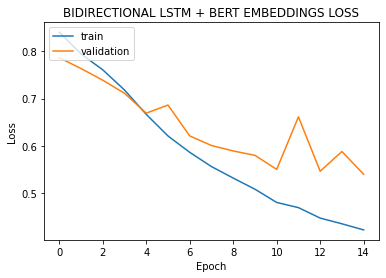

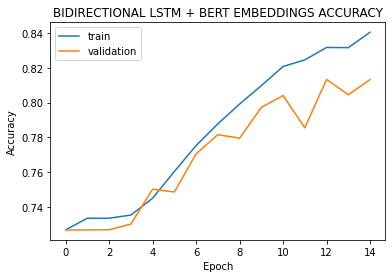

In [33]:
plotLosses(runs)
plotAccuracy(runs)

In [34]:
#https://github.com/FakeNewsChallenge/fnc-1/blob/master/scorer.py

LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
LABELS_RELATED = ['unrelated','related']
RELATED = LABELS[0:3]

def score_submission(gold_labels, test_labels):
    score = 0.0
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        g_stance, t_stance = g, t
        if g_stance == t_stance:
            score += 0.25
            if g_stance != 'unrelated':
                score += 0.50
        if g_stance in RELATED and t_stance in RELATED:
            score += 0.25

        cm[LABELS.index(g_stance)][LABELS.index(t_stance)] += 1

    return score, cm


def print_confusion_matrix(cm):
    lines = []
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    lines.append("-"*line_len)
    lines.append(header)
    lines.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(cm):
        hit += row[i]
        total += sum(row)
        lines.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        lines.append("-"*line_len)
    print('\n'.join(lines))


def report_score(actual,predicted):
    score,cm = score_submission(actual,predicted)
    print("Score",score)
    best_score, _ = score_submission(actual,actual)
    # print("best_Score",best_score)

    print_confusion_matrix(cm)
    print("Score: " +str(score) + " out of " + str(best_score) + "\t("+str(score*100/best_score) + "%)")
    return score*100/best_score

Score 6.75
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     4     |     0     |     1     |     0     |
-------------------------------------------------------------
| disagree  |     0     |     2     |     0     |     0     |
-------------------------------------------------------------
|  discuss  |     0     |     0     |     0     |     0     |
-------------------------------------------------------------
| unrelated |     0     |     0     |     0     |     2     |
-------------------------------------------------------------
Score: 6.75 out of 7.5	(90.0%)


In [37]:
#make predictions

pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 150) dtype=int32>]


In [38]:
#New generate feautures function that only outputs the stance for prediction

def generate_features_comp(stances,dataset,name):
    h, b, y = [],[],[]

    for stance in stances:
        y.append(LABELS.index(stance['Stance']))
        h.append(stance['Headline'])
        b.append(dataset.articles[stance['Body ID']])

    return y
  

comp_dataset = DataSet("competition_test")
y_competition = generate_features_comp(comp_dataset.stances, comp_dataset, "competition")

Xs = dict()
ys = dict()

#Run on competition dataset
actual = [LABELS[int(a)] for a in y_competition]
predict_labels= [LABELS[int(a)] for a in pred]
print(actual)
print(predict_labels)

print("Scores on the test set")
report_score(actual,predict_labels)

Reading dataset
Total stances: 25413
Total bodies: 904
['unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'agree', 'unrelated', 'discuss', 'unrelated', 'discuss', 'agree', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'discuss', 'agree', 'agree', 'disagree', 'discuss', 'unrelated', 'unrelated', 'discuss', 'unrelated', 'agree', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'discuss', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'discuss', 'unrelated', 'discuss', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'discuss', 'unrelated', 'discuss', 'unrelated', 'unrelated', 'unrelated', 'unrelated', 'discuss', 'unrelated', 'unrelated', 'unrelated', 'agree', 'unrelated', 'unrelated', 'unrelated', 'agree', 'unrelated', 'agree', 'unrelated', 'agree', 'unrelated', 'discuss', 'unr

40.980581482673536